<a href="https://colab.research.google.com/github/Nilaadri/Projects/blob/main/NYC_Airbnb_Exploratory_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **NYC Airbnb Exploratory Data Analysis**



##### **Project Type**    - EDA
##### **Contribution**    - Individual
##### **Name**            - Niladri Dhar

# **GitHub Link -**

Provide your GitHub Link here.

# **We will try to find how does the availability and popularity of different types of Airbnb listings vary across the neighborhoods of New York City.**


## ***1. Preparing the Dataset for Analyzing***

### Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

### Dataset Loading

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df= pd.read_csv('/content/drive/MyDrive/Airbnb NYC 2019.csv')

### Dataset First View

In [4]:
df

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2


### Dataset Rows & Columns count

In [5]:
#Number of Columns
print("The Number of Columns =",len(df.columns))

The Number of Columns = 16


In [6]:
#Number of Rows
print("The Number of Rows =",len(df.index))

The Number of Rows = 48895


### Dataset Information

In [7]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

#### Duplicate Values

In [8]:
# Dataset Duplicate Value Count
df.duplicated().value_counts()

False    48895
dtype: int64

This shows that all the Rows are unique, because the number of 'False' match, matches to the number of total rows.

#### Missing Values/Null Values

In [9]:
# Missing Values/Null Values Count
df.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

<Axes: >

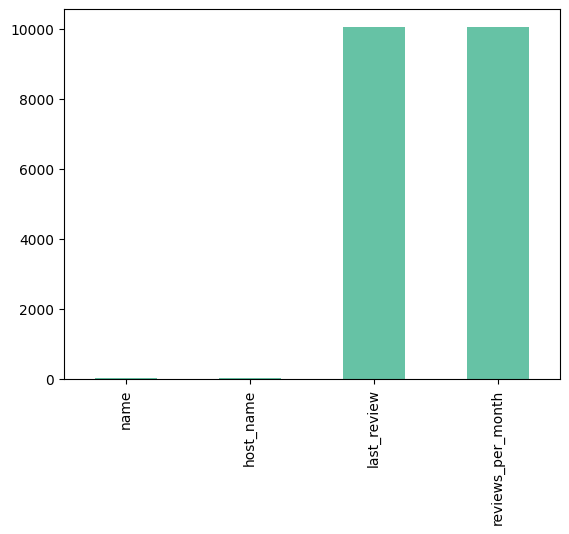

In [10]:
# Visualizing the missing values
df.isnull().sum()[df.isna().sum()>0].plot(kind='bar',colormap='Set2')

### Dealing with the mising values

In [11]:
#Filling in the missing values with Zero because the vaue is directly related to the number of Reviews which is Zero for the repected rows. 
df['last_review'] = df['last_review'].fillna(0)
df['reviews_per_month'] = df['reviews_per_month'].fillna(0)

In [12]:
#Dropping all the Rows containg the missing value for the respected coulmns. 
df.dropna(subset=['name','host_name'], axis=0, inplace=True) 

In [13]:
#Checking the number of missing value in the final cleaned datasest.
df.isnull().sum()

id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
last_review                       0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

###Dealing with Outliers using using IQR Method

<Axes: xlabel='price'>

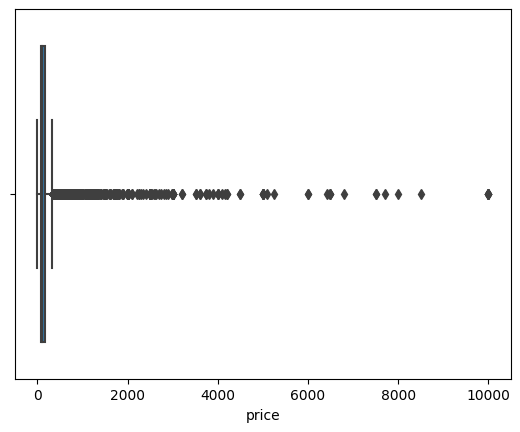

In [14]:
sns.boxplot(x="price", data=df)

In [15]:
df = df[(df['price'] >= df['price'].quantile(0.05)) &
        (df['price'] <= df['price'].quantile(0.95))]

### What did you know about your dataset?

The Airbnb NYC 2019 dataset provides a comprehensive overview of the listing activity and metrics for Airbnb rentals in New York City during the year 2019. With a total of 48,895 rows and 16 columns, this dataset contains essential information that allows for a deeper understanding of hosts, pricing patterns, geographical availability, and other crucial factors needed to make predictions and draw meaningful conclusions about the Airbnb market in NYC.

Each row in the dataset represents a unique listing on Airbnb, while the columns provide various attributes and measurements related to these listings.

By utilizing this dataset, researchers and analysts can gain a comprehensive understanding of the Airbnb market in New York City during 2019. The variables provide valuable information on hosts, pricing dynamics, geographical distribution, availability patterns, and guest feedback, enabling various analyses, predictions, and insights that can contribute to decision-making processes and draw conclusions about the Airbnb ecosystem in NYC.

## ***2. Understanding The Variables***

In [16]:
# Dataset Columns
print(list(df.columns))

['id', 'name', 'host_id', 'host_name', 'neighbourhood_group', 'neighbourhood', 'latitude', 'longitude', 'room_type', 'price', 'minimum_nights', 'number_of_reviews', 'last_review', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365']


In [17]:
# Dataset Describe
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.437800e+04,4.437800e+04,44378.000000,44378.000000,44378.000000,44378.000000,44378.000000,44378.000000,44378.000000,44378.000000
mean,1.878173e+07,6.529035e+07,40.729191,-73.952175,126.722903,6.850624,24.098202,1.109043,6.696088,109.328000
std,1.095775e+07,7.736249e+07,0.054347,0.045549,70.917447,20.024665,45.498807,1.610966,31.665854,130.075351
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,40.000000,1.000000,0.000000,0.000000,1.000000,0.000000
25%,9.292819e+06,7.461100e+06,40.690180,-73.982638,70.000000,1.000000,1.000000,0.050000,1.000000,0.000000
50%,1.936193e+07,2.910057e+07,40.722810,-73.955400,105.000000,2.000000,6.000000,0.390000,1.000000,40.000000
75%,2.881727e+07,1.028339e+08,40.763560,-73.936993,165.000000,5.000000,25.000000,1.620000,2.000000,216.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,355.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


### Variables Description 

Here is the summary of the variables in the dataset:

1. id: 
   - Description: This variable represents a unique identifier for each listing in the dataset.
   - Data Type: Numeric

2. name:
   - Description: This variable represents the title or name of the listing.
   - Data Type: Categorical

3. host_id: 
   - Description: This variable represents the unique identifier of the host for each listing.
   - Data Type: Numeric

4. host_name: 
   - Description: This variable represents the name of the host for each listing.
   - Data Type: Categorical

5. neighbourhood_group: 
   - Description: This variable represents the group of neighborhoods that contain the listing.
   - Data Type: Categorical

6. neighbourhood: 
   - Description: This variable represents the specific neighborhood that contains the listing.
   - Data Type: Categorical

7. latitude:
   - Description: This variable represents the latitude coordinate of the listing's location.
   - Data Type: Numeric

8. longitude: 
   - Description: This variable represents the longitude coordinate of the listing's location.
   - Data Type: Numeric

9. room_type: 
   - Description: This variable represents the type of property being offered, such as entire home/apartment, private room, or shared room.
   - Data Type: Categorical

10. price:
    - Description: This variable represents the price per night for the listing in US dollars.
    - Data Type: Numeric

11. minimum_nights: 
    - Description: This variable represents the minimum number of nights required to book the listing.
    - Data Type: Numeric

12. number_of_reviews: 
    - Description: This variable represents the total number of reviews that the listing has received.
    - Data Type: Numeric

13. last_review: 
    - Description: This variable represents the date of the last review for the listing.
    - Data Type: Date

14. reviews_per_month: 
    - Description: This variable represents the average number of reviews per month for the listing.
    - Data Type: Numeric

15. calculated_host_listings_count: 
    - Description: This variable represents the number of listings that a host has in total.
    - Data Type: Numeric

16. availability_365: 

    - Description: This variable represents the number of days in a year that the listing is available for booking.
    - Data Type: Numeric

### Checking Unique Values for each variable.

In [18]:
#Unique Values for 'neighbourhood_group'

list(df.neighbourhood_group.unique())

['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx']

In [19]:
#Unique Values for 'room_type'

list(df.room_type.unique())

['Private room', 'Entire home/apt', 'Shared room']

In [20]:
#Unique Values for 'host_id'.

df.host_id.value_counts()

219517861    272
107434423    195
30283594      98
12243051      95
61391963      91
            ... 
5059784        1
68309691       1
1520629        1
26225727       1
68119814       1
Name: host_id, Length: 34726, dtype: int64

In [21]:
#Plotting the Top 10 hosts.

th=df.host_id.value_counts().head(10)
th=th.to_frame()
th.reset_index(inplace=True)
th.rename(columns={'index':'Host ID', 'host_id':'Count'}, inplace=True)

[Text(0.5, 1.0, 'Top 10 Host IDs')]

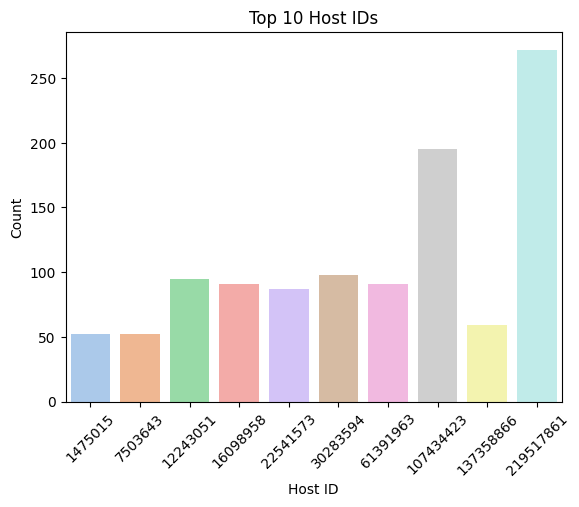

In [22]:
az=sns.barplot(x="Host ID", y="Count", data=th,palette='pastel')
plt.xticks(rotation=45)
az.set(title='Top 10 Host IDs')

A diverse distribution among the top 10 hosts is also noteworthy. It indicates that there are multiple players in the market, each with a considerable number of listings. This competition can be beneficial for customers, as it provides them with a variety of options to choose from, potentially leading to competitive pricing and improved service quality.

## 3. **Data Wrangling and performing Analysis and Plotting them.**

***Now that we have seen the data that we are working with, let's visualize our data in order to get a better understanding of it.***


#### *Map of Neighbourhood group*

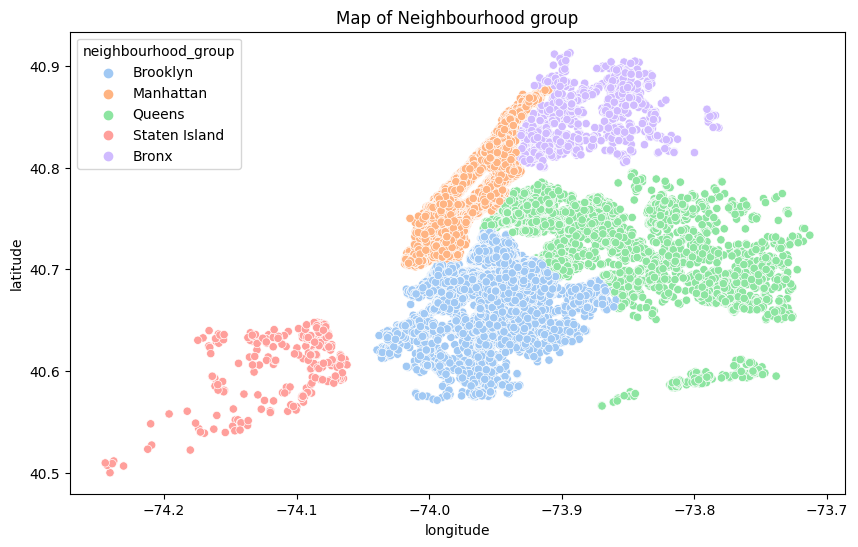

In [23]:
plt.figure(figsize=(10,6))
ax=sns.scatterplot(x=df.longitude,y=df.latitude,hue=df.neighbourhood_group,palette='pastel')
ax.set(title='Map of Neighbourhood group')
plt.show()

#### *First we'll look at the neighbourhood groups, and where Airbnbs are most commonly found.*

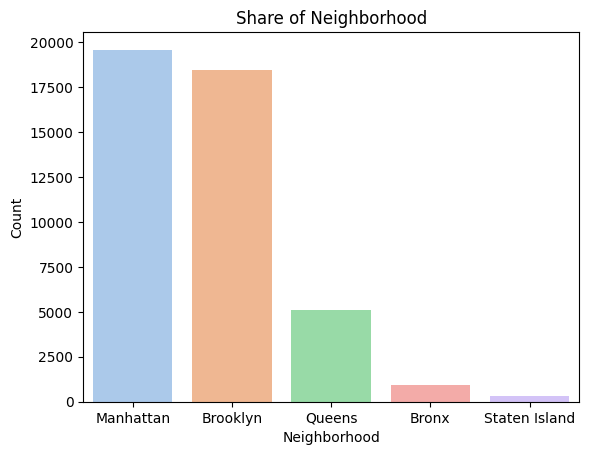

In [24]:
ax1 = sns.barplot(x=df['neighbourhood_group'].value_counts().index,y=df['neighbourhood_group'].value_counts(),palette='pastel')
ax1.set(xlabel='Neighborhood', ylabel='Count', title='Share of Neighborhood')
plt.show()


According to the Airbnb 2019 NYC dataset, Manhattan and Brooklyn indeed have the highest number of listings compared to other neighborhoods in New York City. This phenomenon can be attributed to various factors, including the presence of numerous tourist attractions in both boroughs.

Manhattan, often referred to as the heart of New York City, boasts iconic landmarks such as Times Square, Central Park, the Empire State Building, and Broadway theaters. These attractions attract millions of tourists every year, creating a high demand for accommodation options in the area. 

Brooklyn, on the other hand, has become an increasingly popular destination for travelers seeking a more authentic and diverse New York City experience. The borough offers a rich cultural scene, with neighborhoods like Williamsburg, DUMBO, and Brooklyn Heights known for their unique charm, art galleries, trendy shops, and vibrant culinary offerings. Additionally, Brooklyn offers stunning views of the Manhattan skyline and provides a more relaxed atmosphere compared to the bustling streets of Manhattan. 

#### *The distribution of property prices varies significantly across different neighborhood groups, lets try to providing insights into the affordability and market trends in each area.*

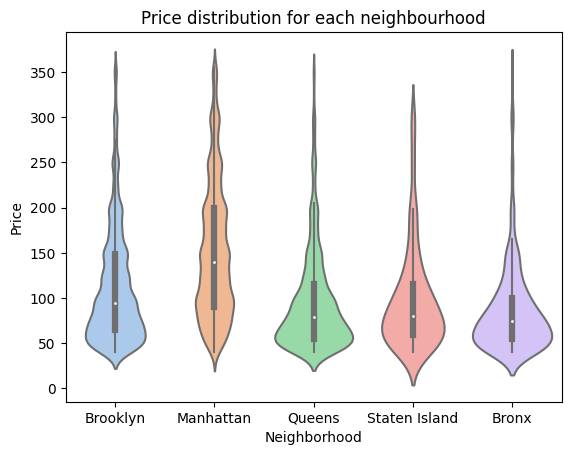

In [25]:
ax2=sns.violinplot(data=df, x='neighbourhood_group', y='price',palette='pastel')
ax2.set(xlabel='Neighborhood', ylabel='Price', title='Price distribution for each neighbourhood')
plt.show()

By examining the data, it becomes evident that Manhattan stands out with a greater concentration of higher-priced properties. On the other hand, Bronx, Staten Island, and Queens exhibit more reasonable price ranges in comparison to Brooklyn and Manhattan. Additionally, it is notable that all neighborhood groups exhibit positive skewness in their price distributions. This distribution and density of prices were completely expected; for example, as it is no secret that Manhattan is one of the most expensive places in the world to live in, where Bronx on other hand appears to have lower standards of living.

#### *let's explore the room types and how the price distribution differs between them.*

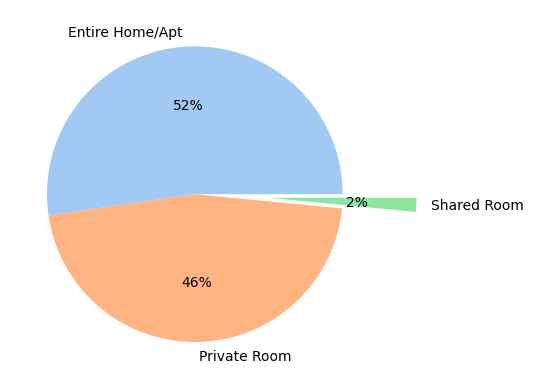

In [26]:
k=['Entire Home/Apt','Private Room','Shared Room']
d=df['room_type'].value_counts()
e = [0, 0, 0.5]
palette_color = sns.color_palette('pastel')
plt.pie(d, labels=k, colors=palette_color,explode=e, autopct='%.0f%%')
plt.show()


We see that entire homes and private rooms are the most common, which may be because the demand for shared rooms is typically lower.

The preference for entire homes and private rooms can be explained by the desire for privacy and comfort that travelers often seek during their stay. Entire homes offer a complete living space, providing guests with the convenience and flexibility of having the place to themselves. Similarly, private rooms offer a sense of privacy while still allowing guests to interact with local hosts or other travelers, creating a more intimate and personalized experience.

On the other hand, the demand for shared rooms is typically lower in these neighborhoods. While shared rooms can be a more affordable option for budget-conscious travelers, they may not be as appealing to the wider market due to concerns about privacy and personal space. Which led travelers to find alternative options that better suit their preferences and needs.